In [1]:
import numpy as np
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from model import LeNet5

## Tensor operation

In [2]:
input_=torch.randn(3,4)
m=nn.Sigmoid()

In [3]:
target=torch.FloatTensor([[0,0,0,1],[0,1,0,0],[0,0,1,0]])
target

tensor([[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])

### loss functions

In [4]:
loss=nn.BCELoss()

In [5]:
loss(m(input_), target)

tensor(0.7637)

In [6]:
loss=nn.BCEWithLogitsLoss()

In [7]:
loss(input_, target)

tensor(0.7637)

## torch.nn.init module

In [8]:
gain = nn.init.calculate_gain('leaky_relu', 0.2)
print(gain)

1.3867504905630728


## Model

In [9]:
print("Preparing model...")
# CUDA
use_cuda = torch.cuda.is_available()
if use_cuda:
    print("CUDA GPU available! Use GPU.")
device = torch.device("cuda" if use_cuda else "cpu")

# model
model = LeNet5().to(device)

Preparing model...
CUDA GPU available! Use GPU.


In [10]:
model.conv1.weight.size() # torch.Size([6, 1, 5, 5]), means six kernels with size 5\times5

torch.Size([6, 1, 5, 5])

In [11]:
x1 = model.conv1.weight
x2 = model.conv1.weight.clone().detach()
x2 = x2.view((-1,1))

In [12]:
x2.requires_grad

False

In [13]:
if use_cuda:
    x3 = x2.cpu().numpy()
else:
    x3 = x2.numpy()

In [14]:
x3.shape

(150, 1)

In [15]:
np.max(x3)*x3.shape[0]

29.82691302895546

In [16]:
hist, bin_edges = np.histogram(x3, density=True)

(array([24., 14., 15., 20., 12., 24., 10., 12., 19.]),
 array([-0.19824779, -0.15412624, -0.11000471, -0.06588317, -0.02176162,
         0.02235992,  0.06648146,  0.110603  ,  0.15472454,  0.19884609],
       dtype=float32),
 <a list of 9 Patch objects>)

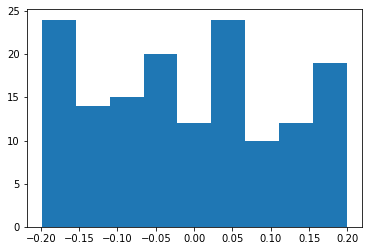

In [17]:
plt.hist(x3, bins='auto')  # arguments are passed to np.histogram

In [18]:
m = nn.Conv2d(16, 33, 3, stride=2)
m1 = m.weight.clone().detach()
m1 = m1.view((-1,1))
print(m1.size()) # torch.Size([4752, 1])
if use_cuda:
    m2 = m1.cpu().numpy()
else:
    m2 = m1.numpy()

torch.Size([4752, 1])


(array([226., 265., 274., 290., 268., 289., 289., 265., 277., 273., 278.,
        249., 242., 252., 264., 264., 208., 279.]),
 array([-8.3286449e-02, -7.4032441e-02, -6.4778425e-02, -5.5524413e-02,
        -4.6270400e-02, -3.7016388e-02, -2.7762376e-02, -1.8508364e-02,
        -9.2543513e-03, -3.3900142e-07,  9.2536733e-03,  1.8507686e-02,
         2.7761698e-02,  3.7015710e-02,  4.6269722e-02,  5.5523735e-02,
         6.4777747e-02,  7.4031755e-02,  8.3285771e-02], dtype=float32),
 <a list of 18 Patch objects>)

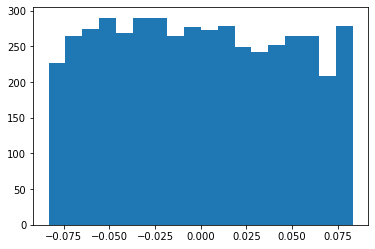

In [19]:
plt.hist(m2, bins='auto')  # arguments are passed to np.histogram

In [20]:
np.max(m2)*m2.shape[0]

395.7739852666855

In [21]:
w = torch.Tensor(50, 100)
t = nn.init.kaiming_uniform_(w, a=math.sqrt(5))
w = w.view((-1,1))
w_np = w.numpy()

In [22]:
w_np.shape

(5000, 1)